In [211]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

Load Data

In [212]:
path = "Dataset"
# Assign class names and label
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_label = {j:i for i, j in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (100, 100) # Adjust the desired image size

In [213]:
def load_data():
    dataset = [path]
    for data in dataset:
        images=  []
        labels = []
        
        print("Loading {}".format(data))
        
        for folder in os.listdir(data):
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(data, folder)):
                # Last 3 character of the file name
                if file[-3:] in {'png','jpg','jpeg'}:
                    img_path = os.path.join(os.path.join(data, folder), file)
                    
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(IMAGE_SIZE)
                    
                    images.append(img)
                    labels.append(label)
                    

        images = np.array([np.array(i) for i in images])
        labels = np.array([np.array(i) for i in labels])
        
    return images, labels

In [214]:
(X, y) = load_data()

print(X.shape)
print(y.shape)

Loading Dataset
(2400, 100, 100, 3)
(2400,)


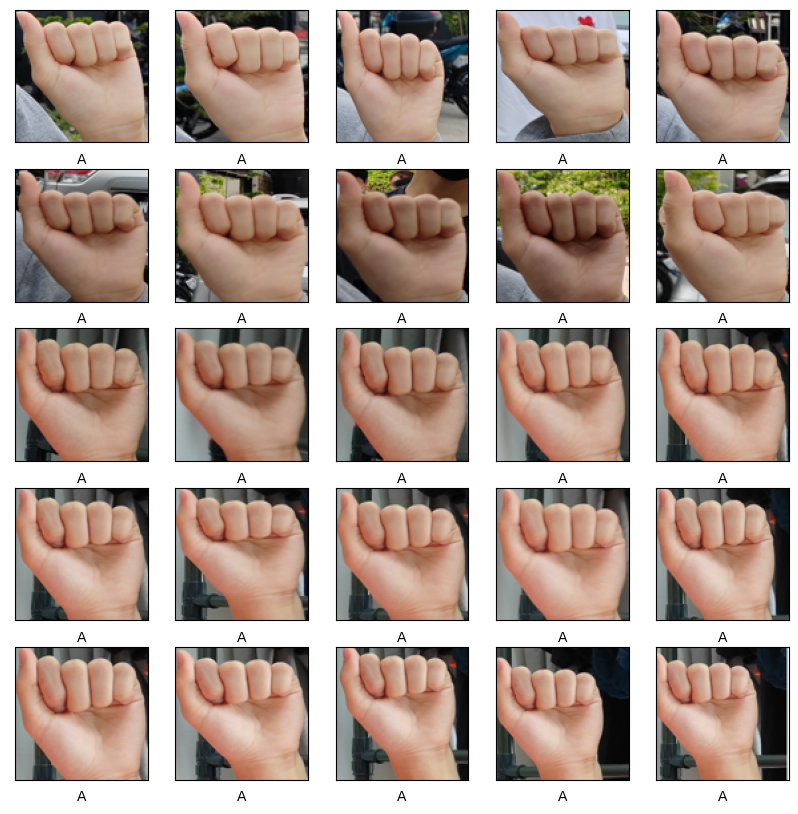

In [215]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(class_names[y[i]])

Split Data

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# 60% Training, 20% Validation, 20% Test
x_train, x_test, y_train, y_test=train_test_split (X,y, 
                                                   test_size=0.2, 
                                                   random_state = 42)

x_train, x_valid, y_train, y_valid=train_test_split (x_train,y_train, 
                                                   test_size=0.25, 
                                                   random_state = 42)

x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

In [217]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 100, 100, 3)
(1440,)
(480, 100, 100, 3)
(480,)
(480, 100, 100, 3)
(480,)


In [218]:
# Flat the image To 2D
x_train_flat = x_train.reshape(-1, 100*100*3)
x_valid_flat = x_valid.reshape(-1, 100*100*3)
x_test_flat = x_test.reshape(-1, 100*100*3)

print(x_train_flat.shape)
print(x_valid_flat.shape)
print(x_test_flat.shape)

(1440, 30000)
(480, 30000)
(480, 30000)


Algorithm - Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=300,
                            max_features=4,
                            n_estimators=4000,
                            random_state=101)

rf.fit(x_train_flat, y_train)

pred = rf.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = rf.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = rf.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Validation accuracy: 0.8479166666666667
Testing accuracy: 0.8729166666666667


Hyperparameter tuning (Random Forest)

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_datasets = [x_train_flat, x_valid_flat, x_test_flat]
y_datasets = [y_train, y_valid, y_test]

max_depths = [100, 200, 300]
max_features = [4, 6, 8]
n_estimators = [2000, 2500, 3000]
best_acc = 0
accuracies = []

for depth in max_depths:
    for features in max_features:
        for estimators in n_estimators:
            rf = RandomForestClassifier(max_depth=depth, # best_depth
                                        max_features=features, # best_features
                                        n_estimators=estimators, # best_estimators
                                        random_state=101)
            rf.fit(x_train_flat, y_train)
            pred_valid = rf.predict(x_valid_flat)
            
            print("Depth: {}, Features: {}, Estimators: {}".format(depth, features, estimators))
            print("Validation accuracy:", accuracy_score(y_valid, pred_valid))
            pred_test = rf.predict(x_test_flat)
            acc = accuracy_score(y_test, pred_test)
            accuracies.append((depth, features, estimators, acc))

            print("Testing Accuracy :", accuracy_score(y_test, pred_test))
            print()
            if acc > best_acc:
                best_acc = acc
                best_depth = depth
                best_features = features
                best_estimators = estimators

Depth: 100, Features: 4, Estimators: 2000
Validation accuracy: 0.85
Testing Accuracy : 0.8666666666666667

Depth: 100, Features: 4, Estimators: 2500
Validation accuracy: 0.8458333333333333
Testing Accuracy : 0.86875

Depth: 100, Features: 4, Estimators: 3000
Validation accuracy: 0.84375
Testing Accuracy : 0.8729166666666667

Depth: 100, Features: 6, Estimators: 2000
Validation accuracy: 0.85
Testing Accuracy : 0.86875

Depth: 100, Features: 6, Estimators: 2500
Validation accuracy: 0.8520833333333333
Testing Accuracy : 0.8666666666666667

Depth: 100, Features: 6, Estimators: 3000
Validation accuracy: 0.8479166666666667
Testing Accuracy : 0.86875

Depth: 100, Features: 8, Estimators: 2000
Validation accuracy: 0.8520833333333333
Testing Accuracy : 0.875

Depth: 100, Features: 8, Estimators: 2500
Validation accuracy: 0.8479166666666667
Testing Accuracy : 0.8791666666666667

Depth: 100, Features: 8, Estimators: 3000
Validation accuracy: 0.8541666666666666
Testing Accuracy : 0.875

Depth: 20

In [221]:
# Depth:100 , Features:8 , Estimators:2500 
# Validation accuracy: 0.
# Testing Accuracy : 0.0.8791666666666667

print("Best hyperparameters RF: max_depth={}, max_features={}, n_estimators={}".format(best_depth, best_features, best_estimators))
print("Best Testing Accuracy: ", best_acc)

Best hyperparameters RF: max_depth=100, max_features=8, n_estimators=2500
Best Testing Accuracy:  0.8791666666666667


In [222]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=best_depth,
                            max_features=best_features,
                            n_estimators=best_estimators,
                            random_state=101)

rf.fit(x_train_flat, y_train)

pred = rf.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = rf.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = rf.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

# Store accuracy in variables for each algorithm
rf_train_acc = train_acc
rf_valid_acc = valid_acc
rf_test_acc = test_acc

Training accuracy: 1.0
Validation accuracy: 0.8479166666666667
Testing accuracy: 0.8791666666666667


Confusion Matrix & Classification Report (Random Forest)

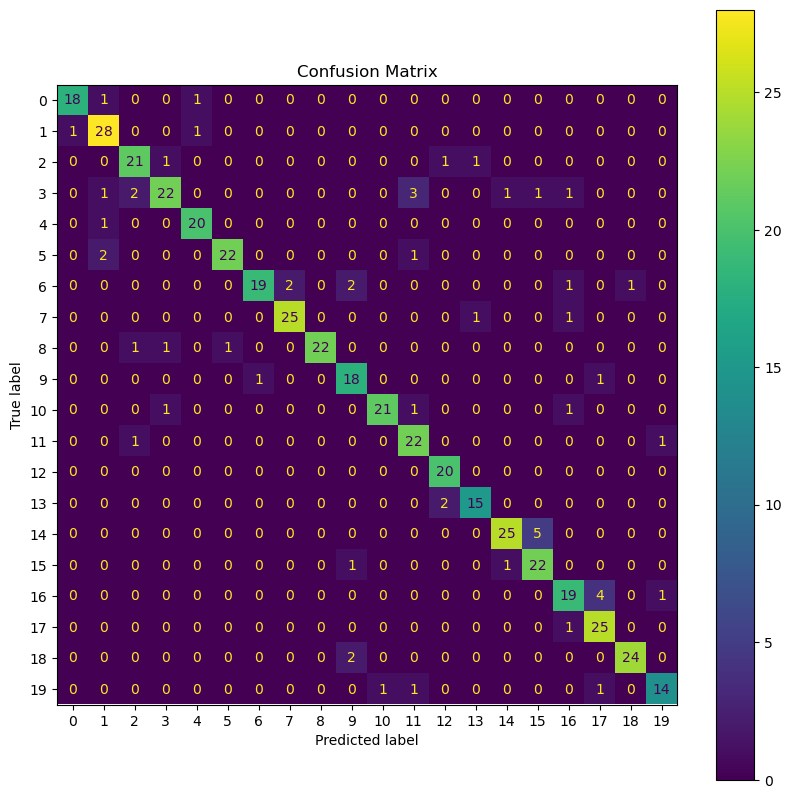

In [223]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

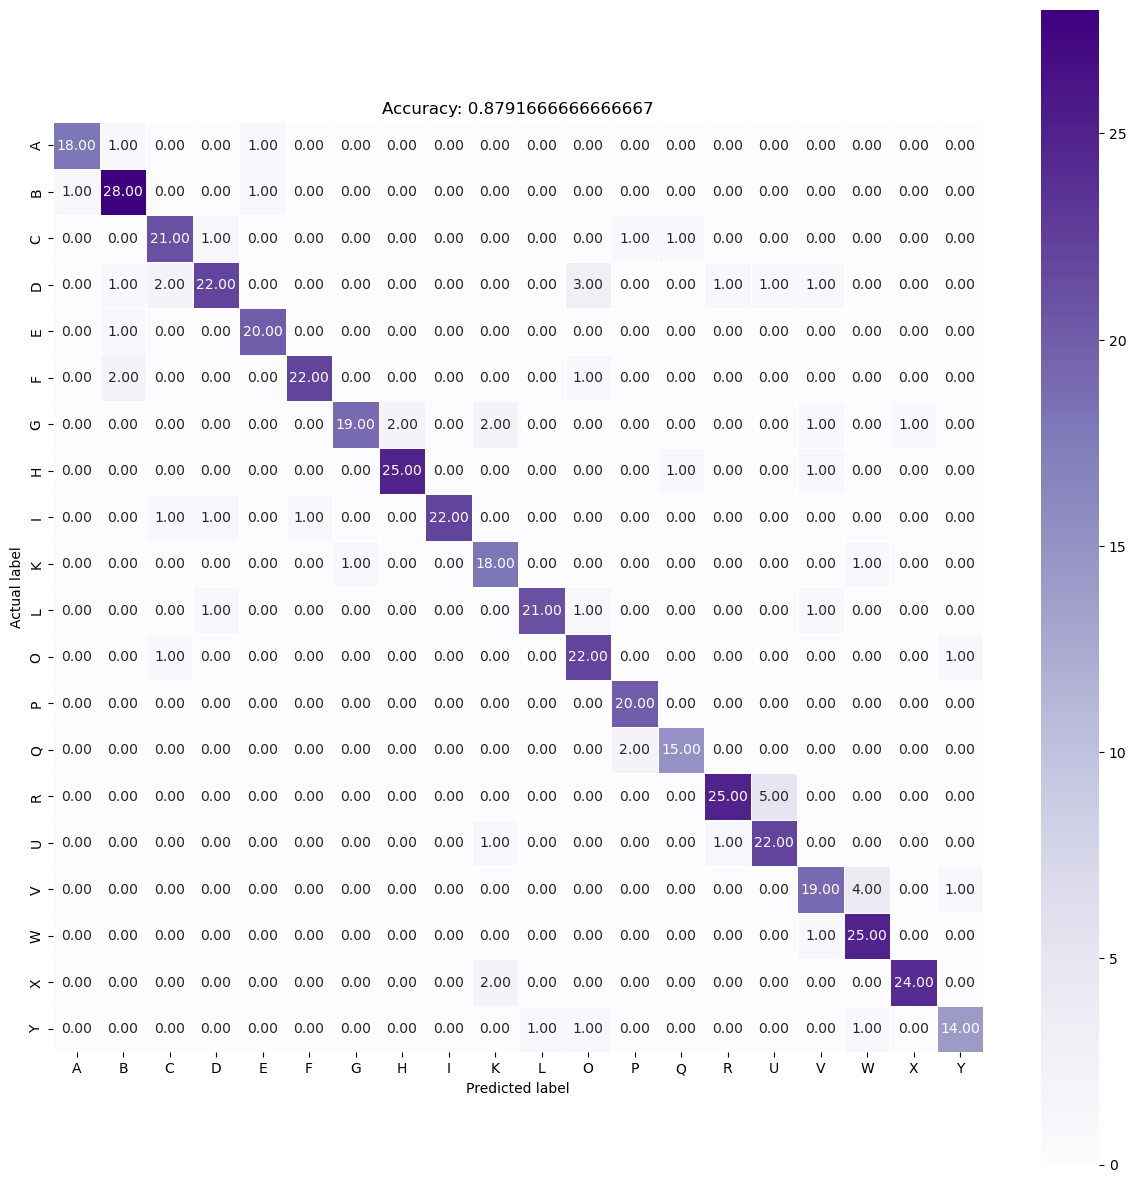

In [224]:
import seaborn as sns

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Purples', xticklabels=class_names, yticklabels=class_names)

plt.title('Accuracy: {}'.format(accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [225]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, pred)
print("Random Forest Classification Report:")
print(classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.85      0.93      0.89        30
           2       0.84      0.88      0.86        24
           3       0.88      0.71      0.79        31
           4       0.91      0.95      0.93        21
           5       0.96      0.88      0.92        25
           6       0.95      0.76      0.84        25
           7       0.93      0.93      0.93        27
           8       1.00      0.88      0.94        25
           9       0.78      0.90      0.84        20
          10       0.95      0.88      0.91        24
          11       0.79      0.92      0.85        24
          12       0.87      1.00      0.93        20
          13       0.88      0.88      0.88        17
          14       0.93      0.83      0.88        30
          15       0.79      0.92      0.85        24
          16       0.79      0.79      0.79 

Algorithm - SVM (Support Vector Machine)

In [226]:
from sklearn import svm

clf = svm.SVC(C=1, gamma=1, kernel='linear')

clf.fit(x_train_flat, y_train)

pred = clf.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = clf.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = clf.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Validation accuracy: 0.85
Testing accuracy: 0.8833333333333333


Hyperparameter tuning (SVM)

In [227]:
from sklearn.metrics import accuracy_score

x_datasets = [x_train_flat, x_valid_flat, x_test_flat]
y_datasets = [y_train, y_valid, y_test]

c = [0.01, 1, 100]
gamma = [1, 0.0001]
kernel = ['linear', 'poly']
best_acc = 0
accuracies = []

for c_size in c: 
    for gamma_size in gamma:
        for kernel_type in kernel:
            clf = svm.SVC(C=(c_size), 
                          gamma=gamma_size, 
                          kernel=kernel_type)
            clf.fit(x_train_flat, y_train)
            pred_valid = clf.predict(x_valid_flat)
            
            print("C: {}, gamma: {}, kernel: {}".format(c_size, gamma_size, kernel_type))
            print("Validation accuracy:", accuracy_score(y_valid, pred_valid))
            pred_test = clf.predict(x_test_flat)
            acc = accuracy_score(y_test, pred_test)
            accuracies.append((c_size, gamma_size, kernel_type))

            print("Testing Accuracy: ", accuracy_score(y_test, pred_test))
            print()
            if acc > best_acc:
                best_acc = acc
                best_c = c_size
                best_gamma = gamma_size
                best_kernel = kernel_type

C: 0.01, gamma: 1, kernel: linear
Validation accuracy: 0.8520833333333333
Testing Accuracy:  0.88125

C: 0.01, gamma: 1, kernel: poly
Validation accuracy: 0.8375
Testing Accuracy:  0.8645833333333334

C: 0.01, gamma: 0.0001, kernel: linear
Validation accuracy: 0.8520833333333333
Testing Accuracy:  0.88125

C: 0.01, gamma: 0.0001, kernel: poly
Validation accuracy: 0.03958333333333333
Testing Accuracy:  0.04583333333333333

C: 1, gamma: 1, kernel: linear
Validation accuracy: 0.85
Testing Accuracy:  0.8833333333333333

C: 1, gamma: 1, kernel: poly
Validation accuracy: 0.8375
Testing Accuracy:  0.8645833333333334

C: 1, gamma: 0.0001, kernel: linear
Validation accuracy: 0.85
Testing Accuracy:  0.8833333333333333

C: 1, gamma: 0.0001, kernel: poly
Validation accuracy: 0.59375
Testing Accuracy:  0.5583333333333333

C: 100, gamma: 1, kernel: linear
Validation accuracy: 0.85
Testing Accuracy:  0.8833333333333333

C: 100, gamma: 1, kernel: poly
Validation accuracy: 0.8375
Testing Accuracy:  0.8

In [228]:
print("Best hyperparameters SVM: C: {}, gamma: {}, kernel: {}".format(best_c, best_gamma, best_kernel))
print("Best Testing accuracy: ", best_acc)

Best hyperparameters SVM: C: 1, gamma: 1, kernel: linear
Best Testing accuracy:  0.8833333333333333


In [229]:
clf = svm.SVC(C=best_c, gamma=best_gamma, kernel=best_kernel,)

clf.fit(x_train_flat, y_train)

pred = clf.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = clf.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = clf.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Validation accuracy: 0.85
Testing accuracy: 0.8833333333333333


Confusion Matrix & Classification Report (SVM)

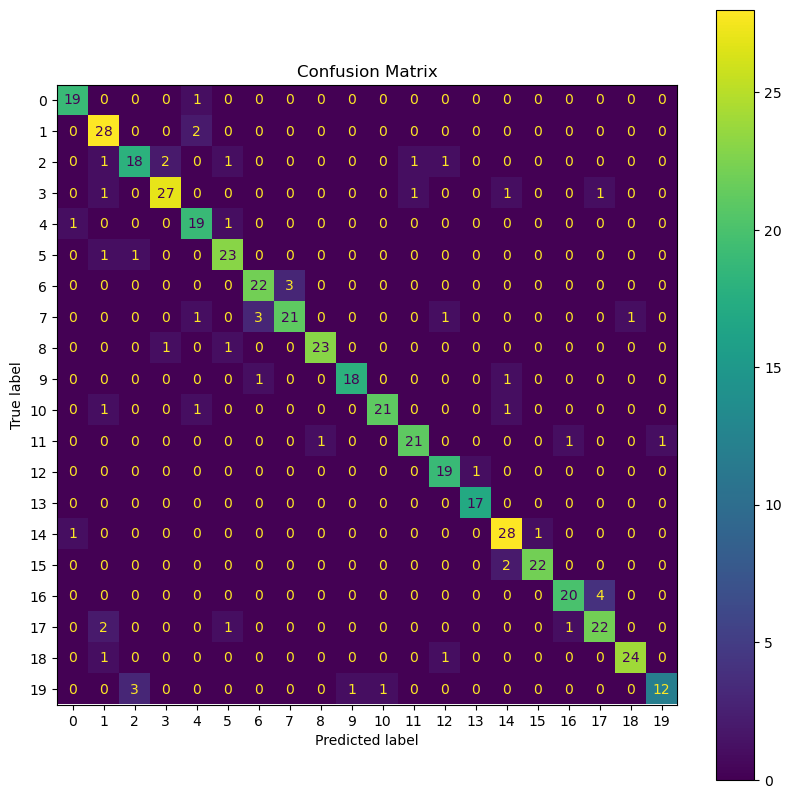

In [230]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

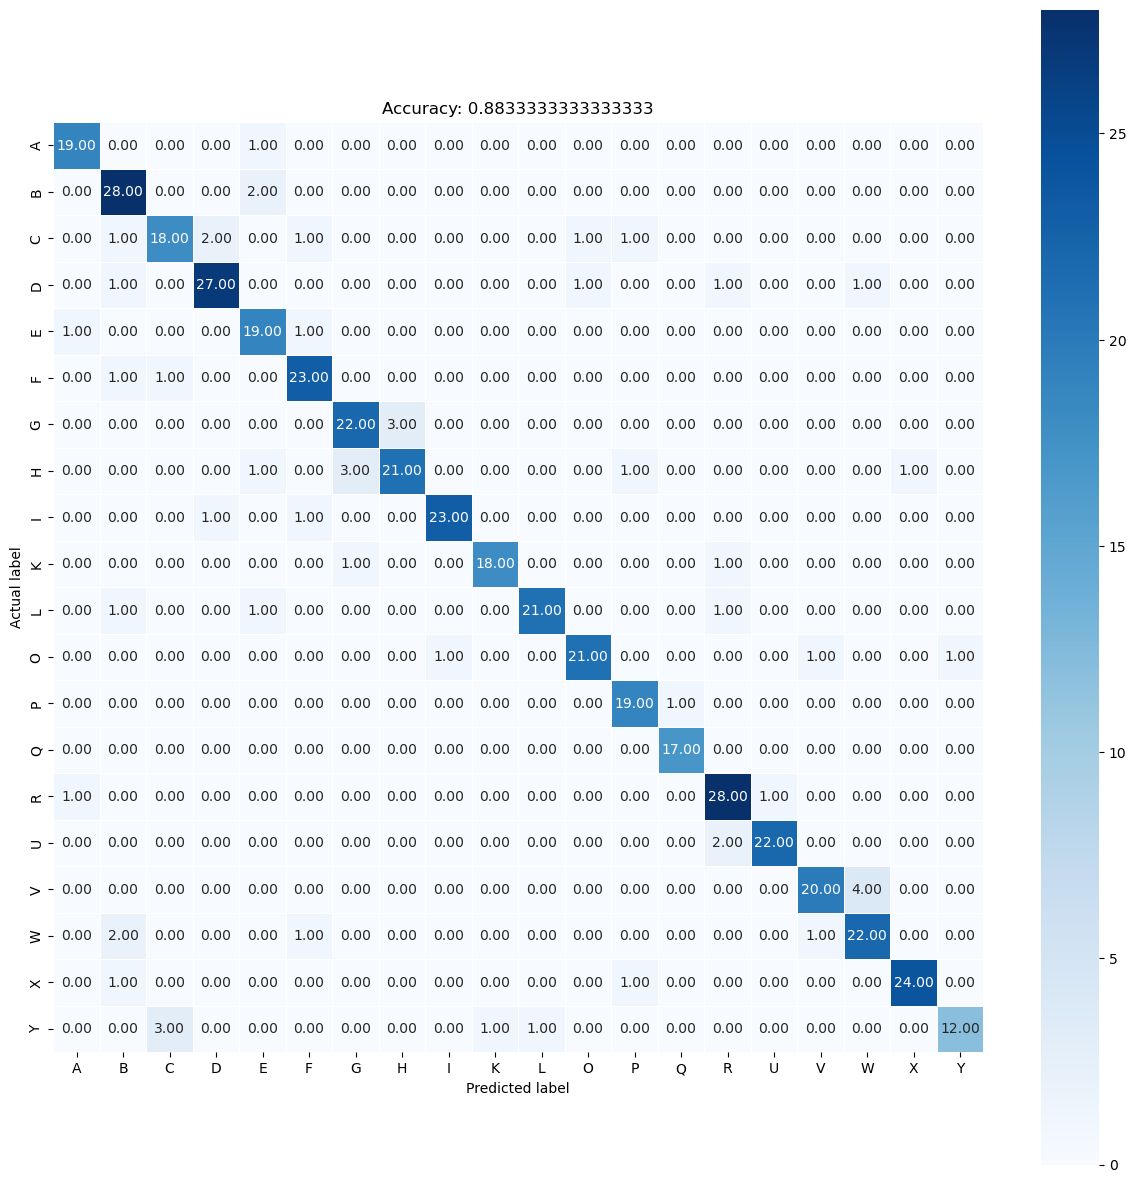

In [231]:
import seaborn as sns

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Accuracy: {}'.format(accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [232]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, pred)
print("SVM Classification Report:")
print(classification_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.80      0.93      0.86        30
           2       0.82      0.75      0.78        24
           3       0.90      0.87      0.89        31
           4       0.79      0.90      0.84        21
           5       0.85      0.92      0.88        25
           6       0.85      0.88      0.86        25
           7       0.88      0.78      0.82        27
           8       0.96      0.92      0.94        25
           9       0.95      0.90      0.92        20
          10       0.95      0.88      0.91        24
          11       0.91      0.88      0.89        24
          12       0.86      0.95      0.90        20
          13       0.94      1.00      0.97        17
          14       0.85      0.93      0.89        30
          15       0.96      0.92      0.94        24
          16       0.91      0.83      0.87        24


Algorithm - MLP (Multi-Layer Perceptron)

In [233]:
from sklearn.neural_network import MLPClassifier 

mlp =  MLPClassifier(hidden_layer_sizes=(300,300,300),
                     max_iter=1500,
                     random_state=42)

mlp.fit(x_train_flat, y_train)

pred = mlp.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = mlp.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = mlp.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9993055555555556
Validation accuracy: 0.7979166666666667
Testing accuracy: 0.8395833333333333


Hyperparameter tuning (MLP)

In [234]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score

x_datasets = [x_train_flat, x_valid_flat, x_test_flat]
y_datasets = [y_train, y_valid, y_test]

hidden_layer_sizes = [[100,100,100],[200,200,200], [300,300,300]]
max_iter = [1000,1500,2000]
random_state = [42,101]
best_acc = 0
accuracies = []

for hidden_layer in hidden_layer_sizes: 
    for iter in max_iter:
        for state in random_state:
            mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer),
                                        max_iter=iter,
                                        random_state=state)
            mlp.fit(x_train_flat, y_train)
            pred_valid = mlp.predict(x_valid_flat)
            
            print("Hidden Layer Sizes: {}, Max Iter: {}, Random State: {}".format(hidden_layer, iter, state))
            print("Validation accuracy:", accuracy_score(y_valid, pred_valid))
            pred_test = mlp.predict(x_test_flat)
            acc = accuracy_score(y_test, pred_test)
            accuracies.append((hidden_layer, iter, state, acc))

            print("Testing Accuracy :", accuracy_score(y_test, pred_test))
            print()
            if acc > best_acc:
                best_acc = acc
                best_hidden_layer_sizes = hidden_layer
                best_iteration = iter
                best_random_state = state

Hidden Layer Sizes: [100, 100, 100], Max Iter: 1000, Random State: 42
Validation accuracy: 0.7875
Testing Accuracy : 0.75

Hidden Layer Sizes: [100, 100, 100], Max Iter: 1000, Random State: 101
Validation accuracy: 0.8291666666666667
Testing Accuracy : 0.8333333333333334

Hidden Layer Sizes: [100, 100, 100], Max Iter: 1500, Random State: 42
Validation accuracy: 0.7875
Testing Accuracy : 0.75

Hidden Layer Sizes: [100, 100, 100], Max Iter: 1500, Random State: 101
Validation accuracy: 0.8291666666666667
Testing Accuracy : 0.8333333333333334

Hidden Layer Sizes: [100, 100, 100], Max Iter: 2000, Random State: 42
Validation accuracy: 0.7875
Testing Accuracy : 0.75

Hidden Layer Sizes: [100, 100, 100], Max Iter: 2000, Random State: 101
Validation accuracy: 0.8291666666666667
Testing Accuracy : 0.8333333333333334

Hidden Layer Sizes: [200, 200, 200], Max Iter: 1000, Random State: 42
Validation accuracy: 0.85
Testing Accuracy : 0.8583333333333333

Hidden Layer Sizes: [200, 200, 200], Max Iter:

In [235]:
print("Best Hidden Layer Sizes: {}, Best Max Iter: {}, Best Random State: {}".format(best_hidden_layer_sizes, best_iteration, best_random_state))
print("Best Testing accuracy:",best_acc)

Best Hidden Layer Sizes: [300, 300, 300], Best Max Iter: 1000, Best Random State: 101
Best Testing accuracy: 0.8645833333333334


In [236]:
from sklearn.neural_network import MLPClassifier 

mlp =  MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,
                     max_iter=best_iteration,
                     random_state=best_random_state)

mlp.fit(x_train_flat, y_train)

pred = mlp.predict(x_train_flat)
train_acc = accuracy_score(y_train, pred)
print("Training accuracy:", train_acc)

pred = mlp.predict(x_valid_flat)
valid_acc = accuracy_score(y_valid, pred)
print("Validation accuracy:", valid_acc)

pred = mlp.predict(x_test_flat)
test_acc = accuracy_score(y_test, pred)
print("Testing accuracy:", test_acc)

# Store accuracy in variables for each algorithm
mlp_train_acc = train_acc
mlp_valid_acc = valid_acc
mlp_test_acc = test_acc

Training accuracy: 1.0
Validation accuracy: 0.8520833333333333
Testing accuracy: 0.8645833333333334


Confusion Matrix & Classification Report (MLP)

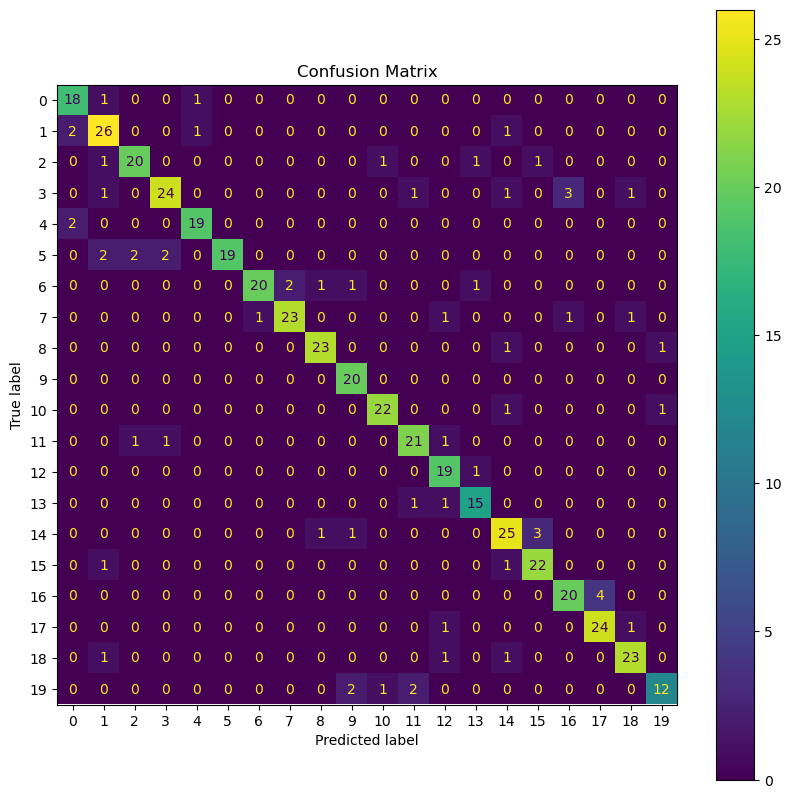

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

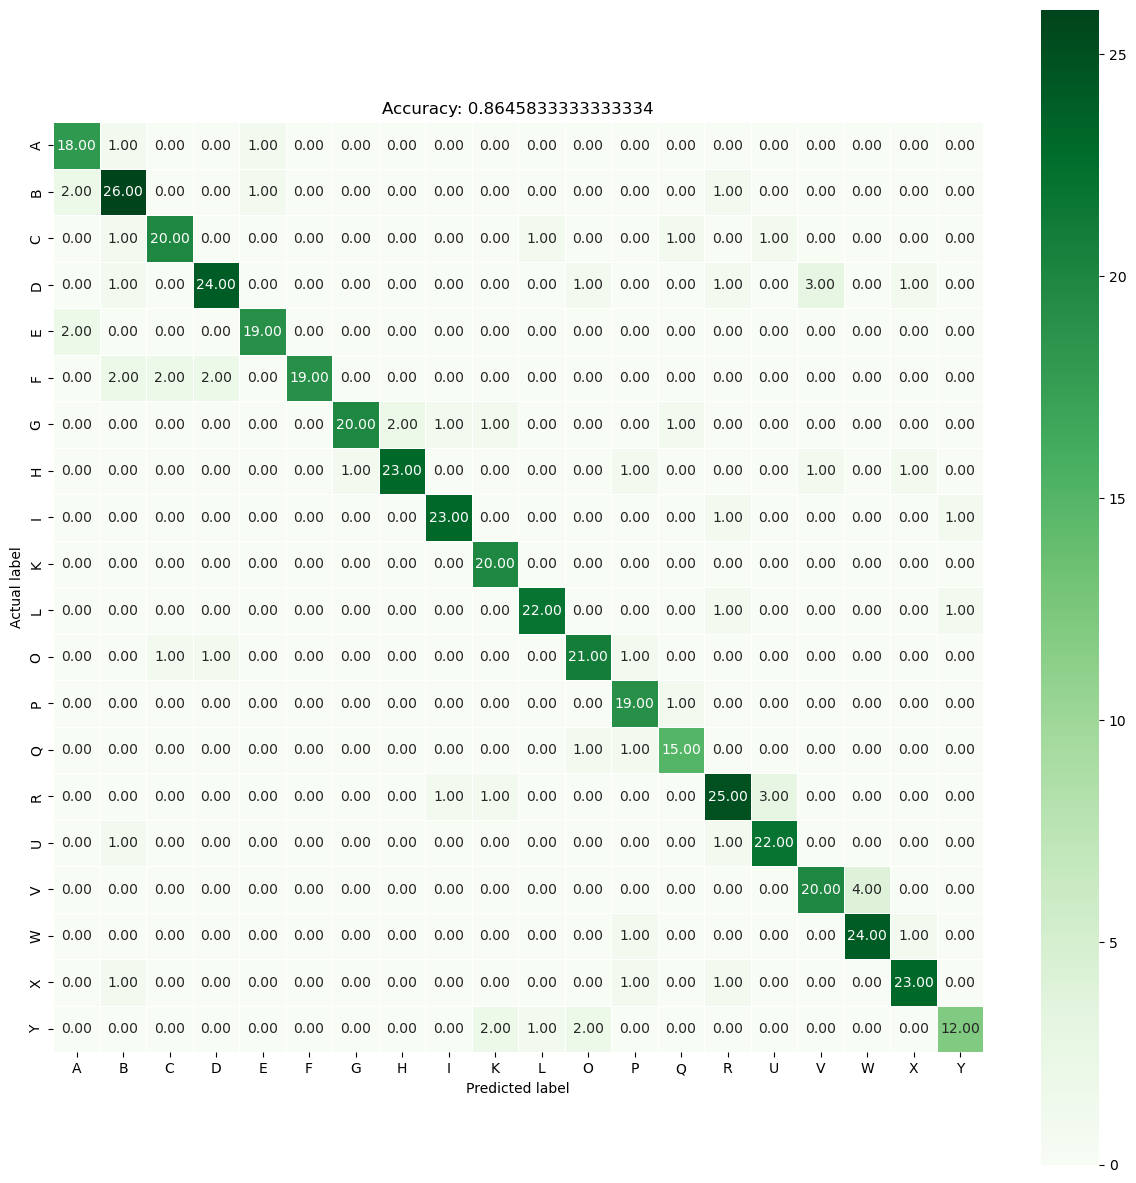

In [238]:
import seaborn as sns

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Greens', xticklabels=class_names, yticklabels=class_names)

plt.title('Accuracy: {}'.format(accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [239]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, pred)
print("MLP Classification Report:")
print(classification_report)

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.79      0.87      0.83        30
           2       0.87      0.83      0.85        24
           3       0.89      0.77      0.83        31
           4       0.90      0.90      0.90        21
           5       1.00      0.76      0.86        25
           6       0.95      0.80      0.87        25
           7       0.92      0.85      0.88        27
           8       0.92      0.92      0.92        25
           9       0.83      1.00      0.91        20
          10       0.92      0.92      0.92        24
          11       0.84      0.88      0.86        24
          12       0.79      0.95      0.86        20
          13       0.83      0.88      0.86        17
          14       0.81      0.83      0.82        30
          15       0.85      0.92      0.88        24
          16       0.83      0.83      0.83        24


Loss Curve (MLP)

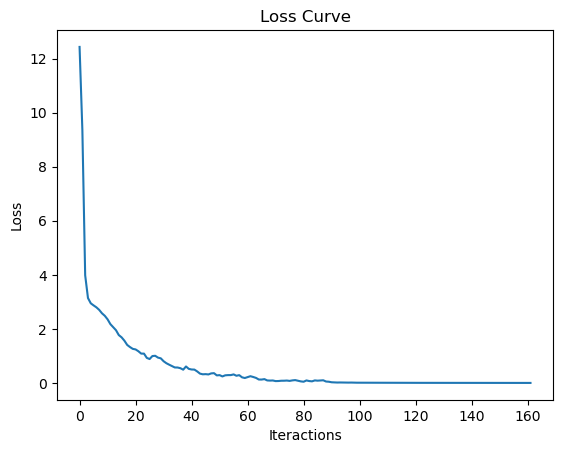

In [240]:
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iteractions')
plt.ylabel('Loss')
plt.show()

Algorithm - CNN (Convolution Neural Network)

In [241]:
# Import necessary libraries
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow import keras
from keras.utils import np_utils

In [242]:
# One hot encoding using keras utilities
n_classes = 20

print("Before ont-hot-encoding (Shape): ", y_train.shape)

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
y_valid = np_utils.to_categorical(y_valid, n_classes)

print("After ont-hot-encoding (Shape): ", y_train.shape)

Before ont-hot-encoding (Shape):  (1440,)
After ont-hot-encoding (Shape):  (1440, 20)


In [243]:
# Create a convolutional base
model  = models.Sequential()

# Convolution layer
# (3,3) kernel size
# (1,1) stride
layer = layers.Conv2D(25, (3,3), (1,1), padding='valid', activation='relu', input_shape=(100,100,3,))

model.add(layer)
model.add(layers.MaxPooling2D((1,1)))

In [244]:
# Architecture of model
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 98, 98, 25)       0         
 g2D)                                                            
                                                                 
Total params: 700
Trainable params: 700
Non-trainable params: 0
_________________________________________________________________


In [245]:
# Add Dense layers on top
model.add(layers.Flatten())
# Hidden layer
model.add(layers.Dense(200, activation='relu'))
# Output layer
model.add(layers.Dense(20, activation='softmax'))

In [246]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 98, 98, 25)       0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 240100)            0         
                                                                 
 dense_56 (Dense)            (None, 200)               48020200  
                                                                 
 dense_57 (Dense)            (None, 20)                4020      
                                                                 
Total params: 48,024,920
Trainable params: 48,024,920
Non-trainable params: 0
_________________________________________

In [247]:
# Compile and fit model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=10, batch_size=120,
                   validation_data=(x_valid, y_valid))

Epoch 1/10
12/12 [==============================] - 11s 887ms/step - loss: 27.0808 - accuracy: 0.0528 - val_loss: 9.3617 - val_accuracy: 0.0458
Epoch 2/10
12/12 [==============================] - 11s 899ms/step - loss: 5.6007 - accuracy: 0.0701 - val_loss: 3.0932 - val_accuracy: 0.0583
Epoch 3/10
12/12 [==============================] - 10s 876ms/step - loss: 2.7522 - accuracy: 0.1729 - val_loss: 2.5773 - val_accuracy: 0.2229
Epoch 4/10
12/12 [==============================] - 10s 880ms/step - loss: 1.8601 - accuracy: 0.5299 - val_loss: 1.5206 - val_accuracy: 0.6313
Epoch 5/10
12/12 [==============================] - 11s 883ms/step - loss: 0.7855 - accuracy: 0.8410 - val_loss: 0.7853 - val_accuracy: 0.8042
Epoch 6/10
12/12 [==============================] - 11s 887ms/step - loss: 0.3021 - accuracy: 0.9340 - val_loss: 0.5912 - val_accuracy: 0.8250
Epoch 7/10
12/12 [==============================] - 11s 897ms/step - loss: 0.1476 - accuracy: 0.9715 - val_loss: 0.4491 - val_accuracy: 0.889

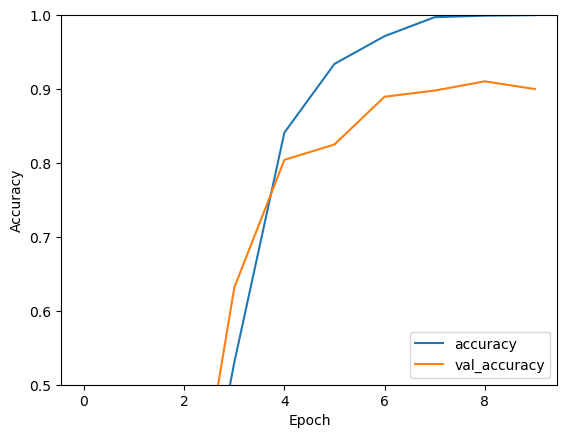

In [248]:
# Evaluate model
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [249]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
valid_loss, valid_acc = model.evaluate(x_valid, y_valid, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print()
print("Training accuracy: %f ; loss = %f" % (train_acc, train_loss))
print("Validation accuracy: %f ; loss = %f" % (valid_acc, valid_loss))
print("Testing accuracy: %f ; loss = %f" % (test_acc, test_loss))

45/45 - 5s - loss: 0.0161 - accuracy: 1.0000 - 5s/epoch - 103ms/step
15/15 - 2s - loss: 0.3450 - accuracy: 0.9000 - 2s/epoch - 104ms/step
15/15 - 2s - loss: 0.2503 - accuracy: 0.9271 - 2s/epoch - 103ms/step

Training accuracy: 1.000000 ; loss = 0.016127
Validation accuracy: 0.900000 ; loss = 0.345036
Testing accuracy: 0.927083 ; loss = 0.250333


Hyperparameter tuning (CNN)

In [250]:
def callCNNModel(conv_layer_size, conv_layer, kernel_size, stride, max_pool_size, epochs, batch_size):
    model  = models.Sequential()

    for i in range(conv_layer_size):
        layer = layers.Conv2D(conv_layer, kernel_size, stride, padding='valid', activation='relu', input_shape=(100,100,3,))
        model.add(layer)
        model.add(layers.MaxPooling2D(max_pool_size))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(20, activation='softmax'))
    
    model.summary()
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    result = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_data=(x_test, y_test))
    
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
    valid_loss, valid_acc = model.evaluate(x_valid, y_valid, verbose=2)
    test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print()
    print("Training accuracy: %f ; loss = %f" % (train_acc, train_loss))
    print("Validation accuracy: %f ; loss = %f" % (valid_acc, valid_loss))
    print("Testing accuracy: %f ; loss = %f" % (test_acc, test_loss))

In [251]:
# Epoch = 15
callCNNModel(1, 25, (3,3), (1,1), (1,1), 15, 120)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 98, 98, 25)       0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 240100)            0         
                                                                 
 dense_58 (Dense)            (None, 200)               48020200  
                                                                 
 dense_59 (Dense)            (None, 20)                4020      
                                                                 
Total params: 48,024,920
Trainable params: 48,024,920
Non-trainable params: 0
_________________________________________

In [252]:
# Epoch = 15, batch_size = 150
callCNNModel(1, 25, (3,3), (1,1), (1,1), 15, 150)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 98, 98, 25)       0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 240100)            0         
                                                                 
 dense_60 (Dense)            (None, 200)               48020200  
                                                                 
 dense_61 (Dense)            (None, 20)                4020      
                                                                 
Total params: 48,024,920
Trainable params: 48,024,920
Non-trainable params: 0
_________________________________________

In [253]:
# Epoch = 15, batch_size = 150, conv2D = 30
callCNNModel(1, 30, (3,3), (1,1), (1,1), 15, 150)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 98, 98, 30)        840       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 98, 98, 30)       0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 288120)            0         
                                                                 
 dense_62 (Dense)            (None, 200)               57624200  
                                                                 
 dense_63 (Dense)            (None, 20)                4020      
                                                                 
Total params: 57,629,060
Trainable params: 57,629,060
Non-trainable params: 0
_________________________________________

In [254]:
# Epoch = 15, batch_size = 150, conv_layer_size = 2, kernel_size = (5,5), strides = (2,2)
callCNNModel(2, 25, (5,5), (2,2), (1,1), 15, 150)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 25)        1900      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 48, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 22, 22, 25)        15650     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 22, 22, 25)       0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 12100)             0         
                                                                 
 dense_64 (Dense)            (None, 200)             

In [255]:
# Epoch = 15, batch_size = 150, pool size = (2,2)
callCNNModel(1, 25, (3,3), (1,1), (2,2), 15, 150)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 49, 49, 25)       0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 60025)             0         
                                                                 
 dense_66 (Dense)            (None, 200)               12005200  
                                                                 
 dense_67 (Dense)            (None, 20)                4020      
                                                                 
Total params: 12,009,920
Trainable params: 12,009,920
Non-trainable params: 0
_________________________________________

In [256]:
# Use dropout method
model  = models.Sequential()

layer = layers.Conv2D(25, (3,3), (1,1), padding='valid', activation='relu', input_shape=(100,100,3,))
model.add(layer)
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

# Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=15, batch_size=150,
                    validation_data=(x_test, y_test))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
valid_loss, valid_acc = model.evaluate(x_valid, y_valid, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print()
print("Training accuracy: %f ; loss = %f" % (train_acc, train_loss))
print("Validation accuracy: %f ; loss = %f" % (valid_acc, valid_loss))
print("Testing accuracy: %f ; loss = %f" % (test_acc, test_loss))

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 49, 49, 25)       0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 60025)             0         
                                                                 
 dropout_3 (Dropout)         (None, 60025)             0         
                                                                 
 dense_68 (Dense)            (None, 200)               12005200  
                                                                 
 dense_69 (Dense)            (None, 20)                4020      
                                                     

In [271]:
# Most stable and highest accuracy
# Epoch = 15, batch_size = 150

model  = models.Sequential()

layer = layers.Conv2D(25, (3,3), (1,1), padding='valid', activation='relu', input_shape=(100,100,3,))
model.add(layer)
model.add(layers.MaxPooling2D((1,1)))

model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=15, batch_size=150,
                    validation_data=(x_test, y_test))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
valid_loss, valid_acc = model.evaluate(x_valid, y_valid, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print()
print("Training accuracy: %f ; loss = %f" % (train_acc, train_loss))
print("Validation accuracy: %f ; loss = %f" % (valid_acc, valid_loss))
print("Testing accuracy: %f ; loss = %f" % (test_acc, test_loss))

# Store accuracy in variables for each algorithm
cnn_train_acc = train_acc
cnn_valid_acc = valid_acc
cnn_test_acc = test_acc

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 98, 98, 25)        700       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 98, 98, 25)       0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 240100)            0         
                                                                 
 dense_84 (Dense)            (None, 200)               48020200  
                                                                 
 dense_85 (Dense)            (None, 20)                4020      
                                                                 
Total params: 48,024,920
Trainable params: 48,024,920
Non-trainable params: 0
_________________________________________

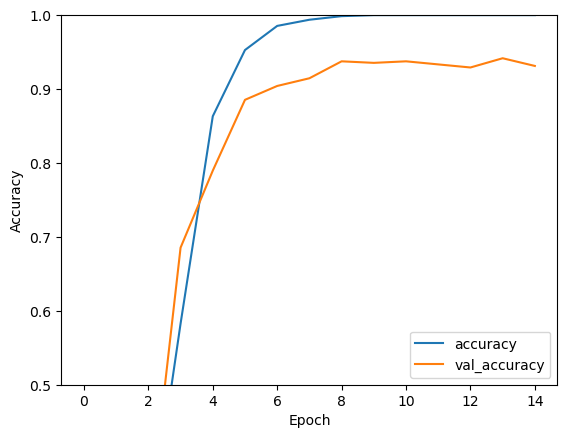

In [272]:
# Evaluate model
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Confusion Matrix & Classification Report (CNN)

15/15 [==============================] - 1s 77ms/step


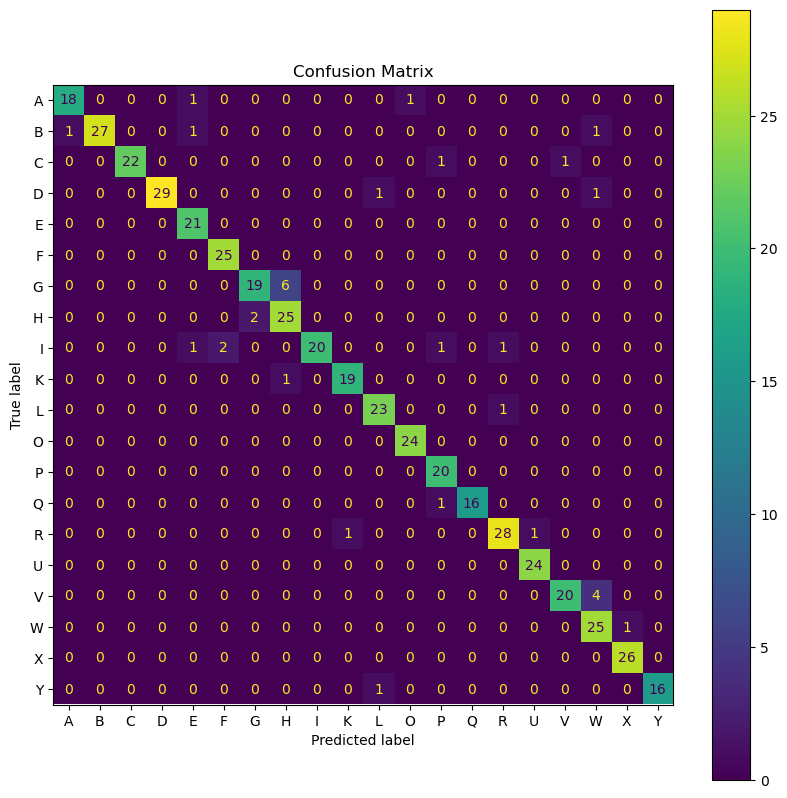

In [273]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)

cm = confusion_matrix(np.argmax(y_test, -1), np.argmax(pred, -1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

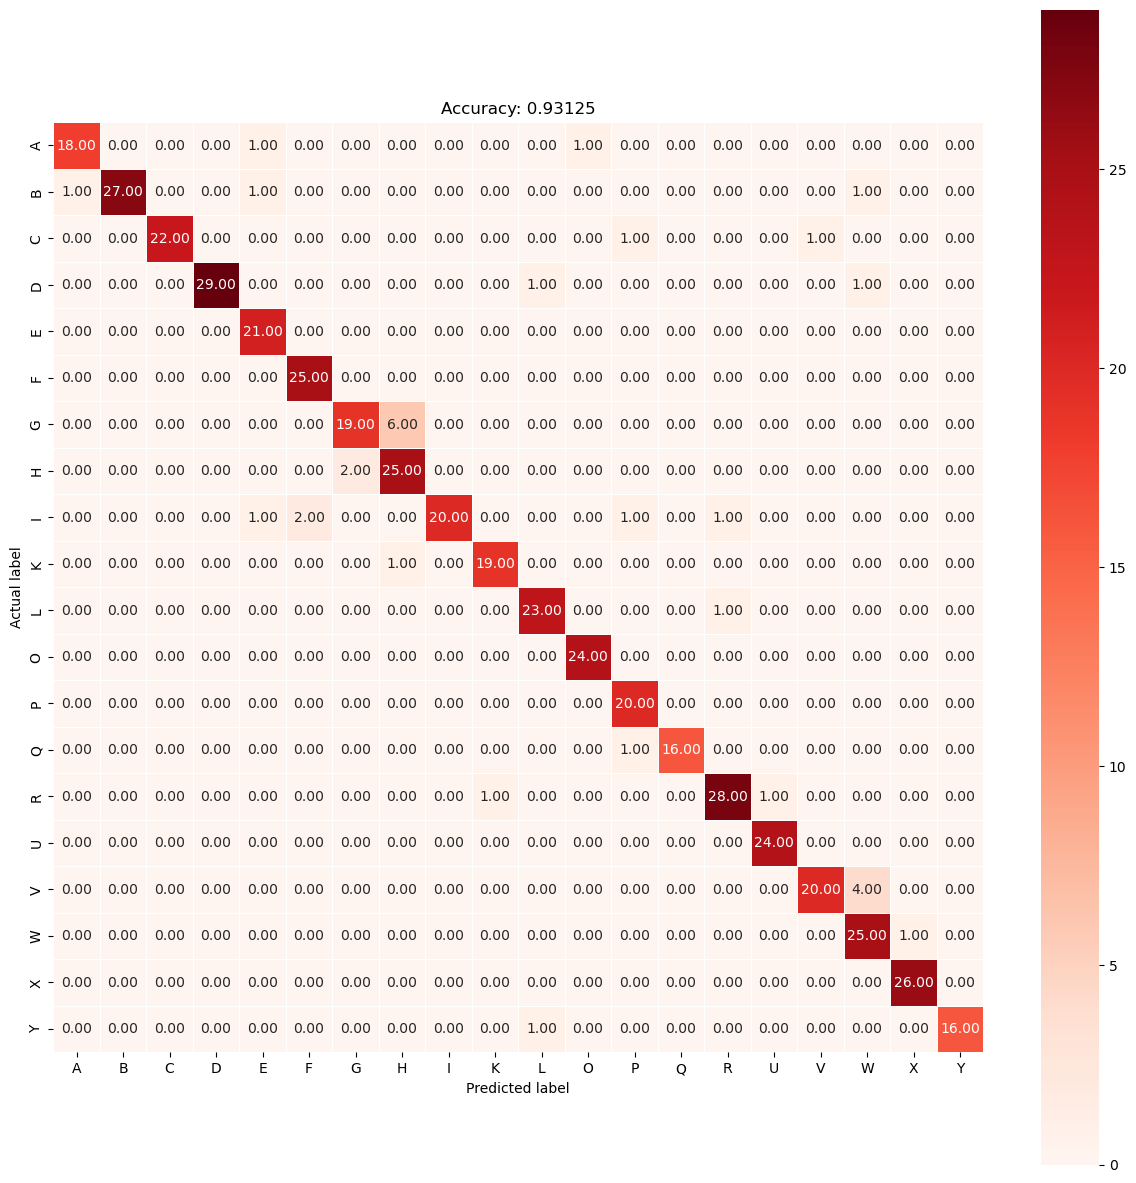

In [274]:
import seaborn as sns

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds', xticklabels=class_names, yticklabels=class_names)

plt.title('Accuracy: {}'.format(accuracy_score(np.argmax(y_test, -1), np.argmax(pred, -1))))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [275]:
from sklearn.metrics import classification_report

classification_report = classification_report(np.argmax(y_test, -1), np.argmax(pred, -1))
print("CNN Classification Report:")
print(classification_report)

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      0.90      0.95        30
           2       1.00      0.92      0.96        24
           3       1.00      0.94      0.97        31
           4       0.88      1.00      0.93        21
           5       0.93      1.00      0.96        25
           6       0.90      0.76      0.83        25
           7       0.78      0.93      0.85        27
           8       1.00      0.80      0.89        25
           9       0.95      0.95      0.95        20
          10       0.92      0.96      0.94        24
          11       0.96      1.00      0.98        24
          12       0.87      1.00      0.93        20
          13       1.00      0.94      0.97        17
          14       0.93      0.93      0.93        30
          15       0.96      1.00      0.98        24
          16       0.95      0.83      0.89        24


1/1 [==============================] - 0s 62ms/step


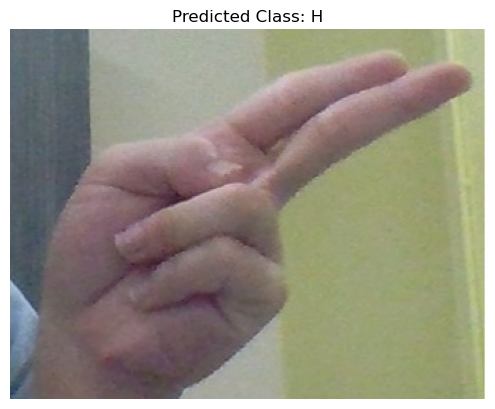

In [276]:
import random

subfolders = [f.path for f in os.scandir(path) if f.is_dir()]

random_subfolder = random.choice(subfolders)

image_files = [f.path for f in os.scandir(random_subfolder) if f.is_file() and f.name.endswith(('.png', '.jpg', '.jpeg'))]

# Select a random image
random_image_path = random.choice(image_files)

# Open the random image
random_image = Image.open(random_image_path)

# Image Preprocessing
random_image_c = random_image.convert('RGB').resize(IMAGE_SIZE)

# Classify the image using the trained SVC model
predicted_probs = model.predict(np.expand_dims(random_image_c, axis=0))
predicted_class_index = np.argmax(predicted_probs)

# Determine the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class name
fig, ax = plt.subplots()

ax.imshow(random_image)
ax.set_title('Predicted Class: ' + predicted_class_name)
ax.axis('off')

plt.show()

Accuracy & Loss of Training & Validation (CNN)

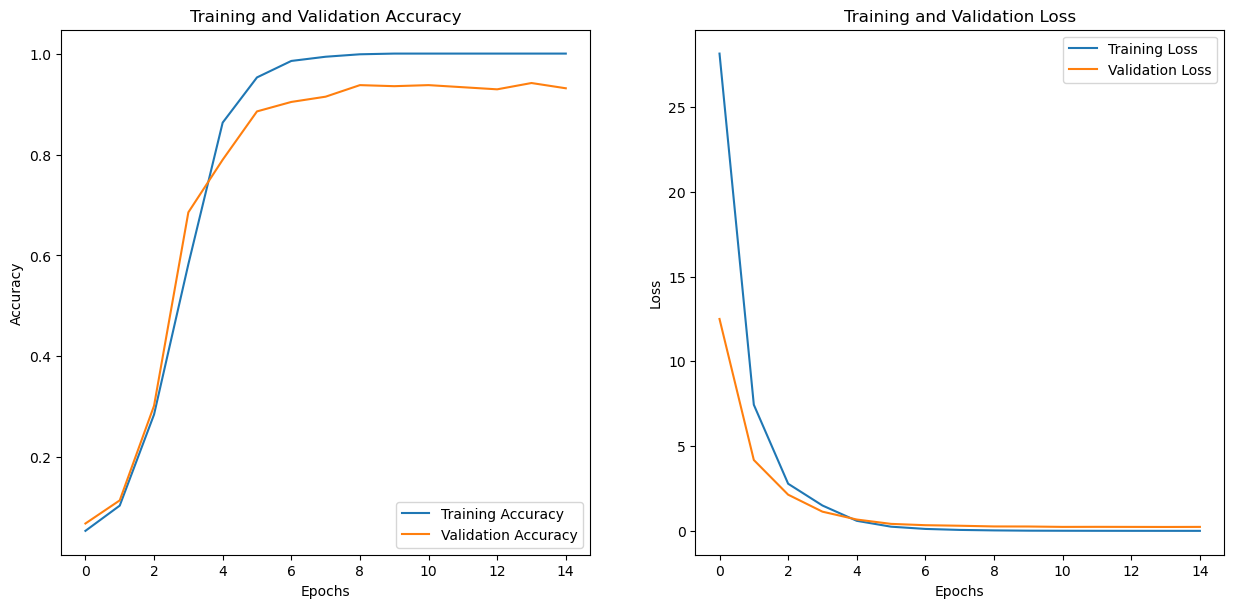

In [277]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Comparison between each algorithm

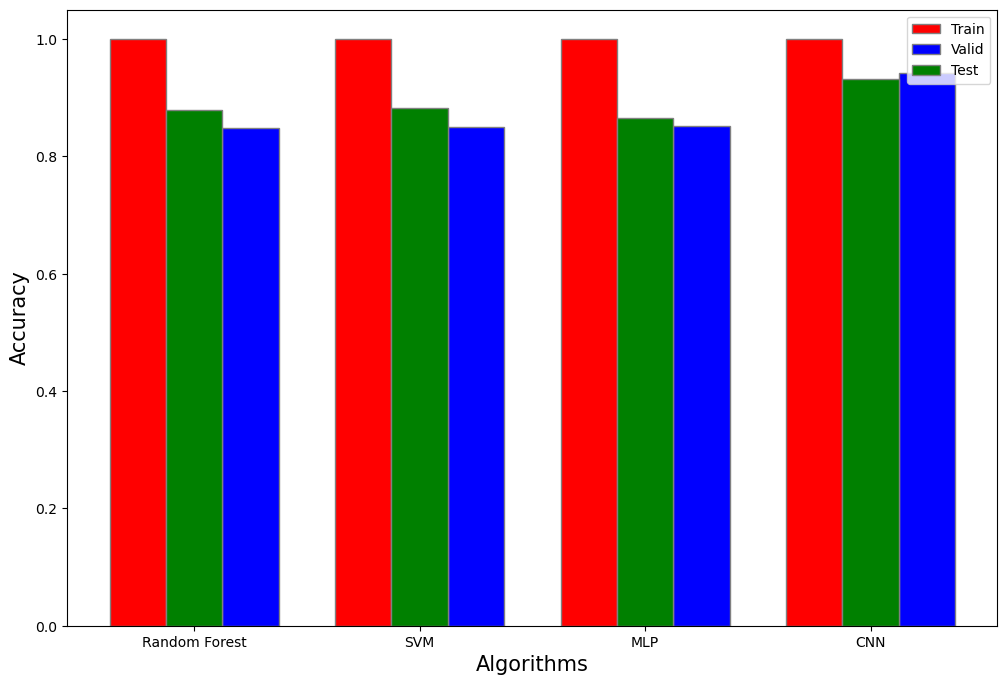

In [278]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set height of bar
train = [rf_train_acc, svm_train_acc, mlp_train_acc, cnn_train_acc] 
valid = [rf_valid_acc, svm_valid_acc, mlp_valid_acc, cnn_valid_acc]
test = [rf_test_acc, svm_test_acc, mlp_test_acc, cnn_test_acc]
 
# Set position of bar on X axis
br1 = np.arange(len(train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, train, color ='r', width = barWidth,
        edgecolor ='grey', label ='Train')
plt.bar(br3, valid, color ='b', width = barWidth,
        edgecolor ='grey', label ='Valid')
plt.bar(br2, test, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test')
 
# Adding Xticks
plt.xlabel('Algorithms', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train))],
           ['Random Forest', 'SVM', 'MLP', 'CNN'])
 
plt.legend()
plt.show()